The purpose of this JupyterLab script is to learn how to use the EMC2 Python software package by recreating the work of Silber et al. (2022), who compared GISS ModelE3 data processed in EMC2 with surface observations at McMurdo Station in Antarctica.

In [1]:
# Import packages

import os
import emc2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib as mpl
import numpy as np
# import netCDF4 as nc
import xarray as xr
from matplotlib.colors import LinearSegmentedColormap

# %whos
# %reset -f KAZR KAZR_time

In [3]:
# Load the observational data for examination

# Load KAZR MD data
KAZR = xr.open_dataset('/g/data/jk72/ck4840/projects/emc2/data/silber_2022/awrkazrcormdM1.c0.20160816T1000.nc')

# Load KAZR GE data
KAZRge = xr.open_dataset('/g/data/jk72/ck4840/projects/emc2/data/silber_2022/awrkazrcorgeM1.c0.20160816T1000.nc')

# Load HSRL data
HSRL = xr.open_dataset('/g/data/jk72/ck4840/projects/emc2/data/silber_2022/mf2hsrl_20160816T1000_30s_7.5m.nc')

# Inspect some properties of these dataframes
# print(KAZR)
# KAZR['time']
# print(KAZR['time'].min())
# print(KAZR['time'].max())
# print(KAZRge['time'].min())
# print(KAZRge['time'].max())
# print(KAZR['signal_to_noise_ratio_copol'].min())
# print(KAZR['signal_to_noise_ratio_copol'].max())

# Create the KAZR variables

KAZR_time = KAZR['time']
KAZR_range = KAZR['range']
KAZR_reflectivity_copol = KAZR['reflectivity_copol']

Number of KAZR_time_mesh rows: 589
Number of KAZR_time_mesh columns: 1803
Number of KAZR_range_mesh rows: 589
Number of KAZR_range_mesh columns: 1803
Number of KAZR_reflectivity_copol rows: 1803
Number of KAZR_reflectivity_copol columns: 589


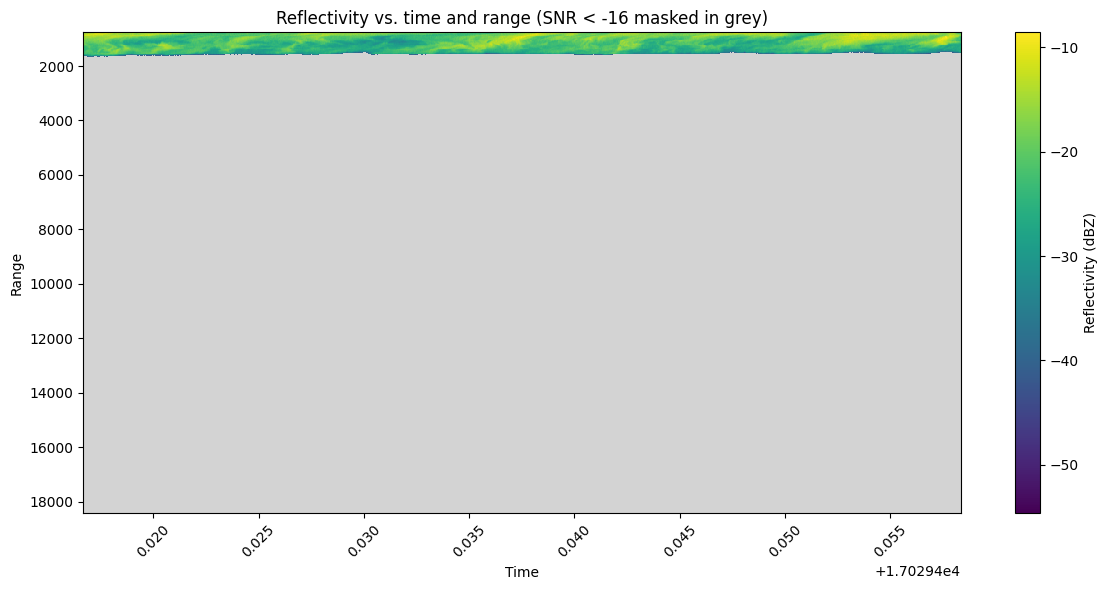

In [7]:
# Assuming you have loaded your KAZR dataset and variables as you did before

# Convert time to numeric values for plotting
KAZR_time_numeric = mdates.date2num(KAZR_time)

# Create a meshgrid for time and range
KAZR_time_mesh, KAZR_range_mesh = np.meshgrid(KAZR_time_numeric, KAZR_range)

# Check meshgrid dimensions
print("Number of KAZR_time_mesh rows:", KAZR_time_mesh.shape[0])
print("Number of KAZR_time_mesh columns:", KAZR_time_mesh.shape[1])
print("Number of KAZR_range_mesh rows:", KAZR_range_mesh.shape[0])
print("Number of KAZR_range_mesh columns:", KAZR_range_mesh.shape[1])
print("Number of KAZR_reflectivity_copol rows:", KAZR_reflectivity_copol.shape[0])
print("Number of KAZR_reflectivity_copol columns:", KAZR_reflectivity_copol.shape[1])

# Create the plot
plt.figure(figsize=(12, 6))

# Set the entire plot background color to grey
plt.gca().set_facecolor('lightgrey')

# Create a pcolormesh plot
pcm = plt.pcolormesh(KAZR_time_mesh, KAZR_range_mesh, KAZR_reflectivity_copol.T, cmap='viridis')

# Mask the data where signal_to_noise_ratio_copol is less than -16 by setting it to grey
masked_reflectivity = np.ma.masked_where(KAZR['signal_to_noise_ratio_copol'] < -16, KAZR_reflectivity_copol)
pcm.set_array(masked_reflectivity.T.ravel())

plt.colorbar(pcm, label='Reflectivity (dBZ)')
plt.xlabel('Time')
plt.ylabel('Range')
plt.title('Reflectivity vs. time and range (SNR < -16 masked in grey)')

# Invert y-axis to match typical radar plots
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()